In [1]:
import pandas as pd
pd.set_option('max_colwidth', 50)
# set this if you need to

In [2]:
import numpy as np

The Health Department has developed an inspection report and scoring system. 
After conducting an inspection of the facility, the Health Inspector calculates a score based on the violations observed. 
Violations can fall into:
- **high risk category**: records specific violations that directly relate to the transmission of food borne illnesses,the adulteration of food products and the contamination of food-contact surfaces.
- **moderate risk category**: records specific violations that are of a moderate risk to the public health and safety.
- **low risk category**: records violations that are low risk or have no immediate risk to the public health and safety.

In [3]:
businesses = pd.read_csv('./data/businesses_plus.csv', parse_dates=True, dtype={'phone_number': str},
                         encoding='latin-1')
businesses.head()
# dtype casts the column as a specific data type

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,application_date,owner_name,owner_address,owner_city,owner_state,owner_zip
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,NaN,Tiramisu LLC,33 Belden St,San Francisco,CA,94104
1,19,Nrgize Lifestyle Cafe,"1200 Van Ness Ave, 3rd Floor",San Francisco,94109,37.786848,-122.421547,NaN,H24,NaN,NaN,24 Hour Fitness Inc,"1200 Van Ness Ave, 3rd Floor",San Francisco,CA,94109
2,24,OMNI S.F. Hotel - 2nd Floor Pantry,"500 California St, 2nd Floor",San Francisco,94104,37.792888,-122.403135,NaN,H24,352312.0,NaN,OMNI San Francisco Hotel Corp,"500 California St, 2nd Floor",San Francisco,CA,94104
3,31,Norman's Ice Cream and Freezes,2801 Leavenworth St,San Francisco,94133,37.807155,-122.419004,NaN,H24,346882.0,NaN,Norman Antiforda,2801 Leavenworth St,San Francisco,CA,94133
4,45,CHARLIE'S DELI CAFE,3202 FOLSOM St,S.F.,94110,37.747114,-122.413641,NaN,H24,340024.0,10/10/2001,"HARB, CHARLES AND KRISTIN",1150 SANCHEZ,S.F.,CA,94114


In [4]:
inspections = pd.read_csv('./data/inspections_plus.csv', parse_dates=True)
inspections.head()

,business_id,Score,date,type
0,10,NaN,20140807,Reinspection/Followup
1,10,94.0,20140729,Routine - Unscheduled
2,10,NaN,20140124,Reinspection/Followup
3,10,92.0,20140114,Routine - Unscheduled
4,19,94.0,20141110,Routine - Unscheduled


In [5]:
violations = pd.read_csv('./data/violations_plus.csv', parse_dates=True)
violations.head()

,business_id,date,ViolationTypeID,risk_category,description
0,10,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [6]:
# 1 Combine the three dataframes into one data frame called restaurant_scores
# Hint: http://pandas.pydata.org/pandas-docs/stable/merging.html

In [7]:
frames = [businesses, inspections, violations]

In [66]:
first = pd.merge(businesses, inspections, on='business_id')
restaurant_scores = pd.merge(first, violations, on='business_id', suffixes=('_inspections', '_violations'))

In [68]:
restaurant_scores

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,...,owner_city,owner_state,owner_zip,Score,date_inspections,type,date_violations,ViolationTypeID,risk_category,description
0,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,NaN,20140807,Reinspection/Followup,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
1,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,NaN,20140807,Reinspection/Followup,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,NaN,20140807,Reinspection/Followup,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
3,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,NaN,20140807,Reinspection/Followup,20140729,103129,Moderate Risk,Insufficient hot water or running water
4,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,NaN,20140807,Reinspection/Followup,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils
5,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,94.0,20140729,Routine - Unscheduled,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
6,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,94.0,20140729,Routine - Unscheduled,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
7,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,94.0,20140729,Routine - Unscheduled,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
8,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,94.0,20140729,Routine - Unscheduled,20140729,103129,Moderate Risk,Insufficient hot water or running water
9,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,94.0,20140729,Routine - Unscheduled,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [10]:
# 2 Which ten business have had the most inspections?

In [69]:
restaurant_scores.type.value_counts().head(1)

Routine - Unscheduled    128015
Name: type, dtype: int64

In [15]:
restaurant_scores.sort_index(by='type', inplace = True)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  if __name__ == '__main__':


In [70]:
restaurant_scores.name.value_counts().head(10)

Yama Sushi Restaurant           736
Lers Ros Thai Noodle            685
Dol-Ho Restaurant               684
Dragon River Restaurant         646
Cafe Bakery                     621
RIVERSIDE SEAFOOD RESTAURANT    570
Peet's Coffee & Tea             557
Chez Fayala                     544
The Brick Yard                  504
Sunmoon Market, Inc.            480
Name: name, dtype: int64

In [17]:
# 3 Group and count the inspections by type

In [71]:
restaurant_scores.type.value_counts()

Routine - Unscheduled                128015
Reinspection/Followup                 67793
Complaint                             18157
New Ownership                          8646
Non-inspection site visit              7683
New Construction                       5565
Complaint Reinspection/Followup        1695
Foodborne Illness Investigation        1031
Structural Inspection                   605
Routine - Scheduled                     232
Administrative or Document Review        49
Multi-agency Investigation               18
Special Event                            16
Name: type, dtype: int64

In [72]:
# 4 Create a plot that shows number of inspections per month
# Bonus for creating a heatmap
# http://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.heatmap.html?highlight=heatmap

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
restaurant_scores.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239505 entries, 0 to 239504
Data columns (total 23 columns):
business_id             239505 non-null int64
name                    239505 non-null object
address                 239505 non-null object
city                    210375 non-null object
postal_code             235036 non-null object
latitude                187603 non-null float64
longitude               187603 non-null float64
phone_number            67627 non-null object
TaxCode                 239505 non-null object
business_certificate    212787 non-null float64
application_date        172966 non-null object
owner_name              238759 non-null object
owner_address           238573 non-null object
owner_city              238219 non-null object
owner_state             238191 non-null object
owner_zip               237828 non-null object
Score                   127069 non-null float64
date_inspections        239505 non-null int64
type                    239505 non-null ob

In [75]:
# Set the index to type 'DatetimeIndex' by reading 'date' column with format YYYYMMDD
restaurant_scores.index = pd.to_datetime(restaurant_scores['date_inspections'], format='%Y%m%d')
restaurant_scores.head()

,business_id,name,address,city,postal_code,latitude,longitude,phone_number,TaxCode,business_certificate,...,owner_city,owner_state,owner_zip,Score,date_inspections,type,date_violations,ViolationTypeID,risk_category,description
date_inspections,,,,,,,,,,,,,,,,,,,,,
2014-08-07,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,NaN,20140807,Reinspection/Followup,20140114,103154,Low Risk,Unclean or degraded floors walls or ceilings
2014-08-07,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,NaN,20140807,Reinspection/Followup,20140114,103119,Moderate Risk,Inadequate and inaccessible handwashing facili...
2014-08-07,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,NaN,20140807,Reinspection/Followup,20140114,103145,Low Risk,Improper storage of equipment utensils or linens
2014-08-07,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,NaN,20140807,Reinspection/Followup,20140729,103129,Moderate Risk,Insufficient hot water or running water
2014-08-07,10,Tiramisu Kitchen,033 Belden Pl,San Francisco,94104,37.791116,-122.403816,NaN,H24,779059.0,...,San Francisco,CA,94104,NaN,20140807,Reinspection/Followup,20140729,103144,Low Risk,Unapproved or unmaintained equipment or utensils


In [79]:
df = restaurant_scores
df.index.year
df.index.month

array([8, 8, 8, ..., 3, 3, 3], dtype=int32)

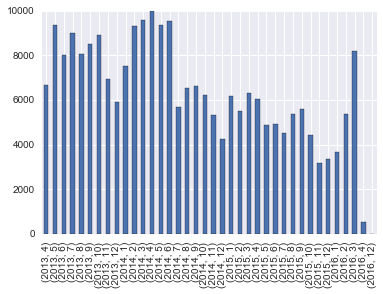

In [81]:
# Generate histogram after removing empty rows
df['business_id'].groupby([df.index.year, df.index.month]).count().plot(kind='bar')

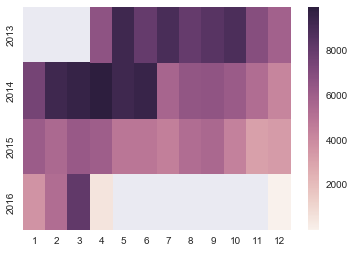

In [83]:
# Generate heatmap for inspections per month per year
sns.heatmap(df['business_id'].groupby([df.index.year, df.index.month]).count().unstack())

In [ ]:
# 5 Which zip code contains the most high risk violations?
# Answer: 94133 (I hate North Beach anyway)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239505 entries, 2014-08-07 to 2016-03-29
Data columns (total 23 columns):
business_id             239505 non-null int64
name                    239505 non-null object
address                 239505 non-null object
city                    210375 non-null object
postal_code             235036 non-null object
latitude                187603 non-null float64
longitude               187603 non-null float64
phone_number            67627 non-null object
TaxCode                 239505 non-null object
business_certificate    212787 non-null float64
application_date        172966 non-null object
owner_name              238759 non-null object
owner_address           238573 non-null object
owner_city              238219 non-null object
owner_state             238191 non-null object
owner_zip               237828 non-null object
Score                   127069 non-null float64
date_inspections        239505 non-null int64
type                    23

In [92]:
df['date_violations'].isnull().sum()

0

In [94]:
df[df['risk_category']=='High Risk'].groupby('postal_code').size().sort_values(ascending=False)

postal_code
94133    3640
94110    3595
94109    2833
94122    2624
94103    2606
94102    2596
94108    1727
94114    1661
94115    1553
94107    1402
94121    1399
94118    1321
94117    1198
94112     986
94124     905
94104     861
94123     855
94116     853
94111     811
94134     539
94105     469
94132     442
94127     421
94131     363
94143      65
94014      54
94101      32
00000      28
CA         19
94158       6
94120       5
94513       3
94129       3
94130       2
dtype: int64

In [ ]:
# 6 If inspection is prompted by a change in restaurant ownership, 
# is the inspection more likely to be categorized as higher or lower risk?

# Answer: Lower risk is more likely 

In [101]:
indexes_to_find = df['type']=='New Ownership'
df[indexes_to_find].groupby('risk_category').size().sort_values(ascending=False)

risk_category
Low Risk         4431
Moderate Risk    2952
High Risk        1263
dtype: int64

In [ ]:
# 7 Examining the descriptions, what is the most common violation?
# Answer: Unclean or degraded floor walls or ceilings

In [109]:
df.groupby('description').size().sort_values(ascending=False)

description
Unclean or degraded floors walls or ceilings                                 20839
Moderate risk food holding temperature                                       15040
Unapproved or unmaintained equipment or utensils                             14135
Inadequate and inaccessible handwashing facilities                           14000
Unclean nonfood contact surfaces                                             13742
Inadequately cleaned or sanitized food contact surfaces                      13339
Wiping cloths not clean or properly stored or inadequate sanitizer           13138
Improper food storage                                                        12885
Foods not protected from contamination                                       11573
High risk food holding temperature                                           10216
Moderate risk vermin infestation                                              9109
Improper storage of equipment utensils or linens                           

In [ ]:
# 8 Create a hist of the scores with 10 bins

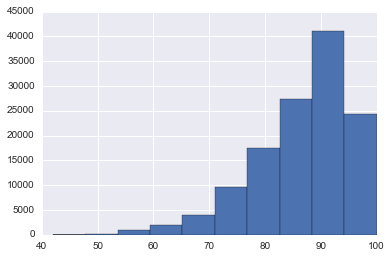

In [115]:
df.Score.hist(bins=10)

In [ ]:
# 9 Can you predict risk category based on the other features in this dataset?
# Answer: Yes, because the risk type is determined by the nature of the violations. So if a business has more "risky" violations such as foodborn illnesses, we can detrmine the risk type.

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 239505 entries, 2014-08-07 to 2016-03-29
Data columns (total 23 columns):
business_id             239505 non-null int64
name                    239505 non-null object
address                 239505 non-null object
city                    210375 non-null object
postal_code             235036 non-null object
latitude                187603 non-null float64
longitude               187603 non-null float64
phone_number            67627 non-null object
TaxCode                 239505 non-null object
business_certificate    212787 non-null float64
application_date        172966 non-null object
owner_name              238759 non-null object
owner_address           238573 non-null object
owner_city              238219 non-null object
owner_state             238191 non-null object
owner_zip               237828 non-null object
Score                   127069 non-null float64
date_inspections        239505 non-null int64
type                    23

In [ ]:
# 10 Extra Credit:
# Use Instagram location API to find pictures taken at the lat, long of the most High Risk restaurant
# https://www.instagram.com/developer/endpoints/locations/

In [ ]:
############################
### A Little More Morbid ###
############################

In [118]:
killings = pd.read_csv('./data/police-killings.csv', encoding='latin-1')
killings.head()

,Unnamed: 0,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,lawenforcementagency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [ ]:
# 1. Make the following changed to column names:
# lawenforcementagency -> agency
# raceethnicity        -> race

In [119]:
killings.rename(columns={'lawenforcementagency':'agency', 'raceethnicity':'race'}, inplace=True)

In [120]:
killings.head()

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669


In [ ]:
# 2. Show the count of missing values in each column

In [121]:
killings.isnull().sum()

Unnamed: 0       0
name             0
age              0
gender           0
race             0
month            0
day              0
year             0
streetaddress    4
city             0
state            0
agency           0
cause            0
armed            0
county_income    0
dtype: int64

In [132]:
killings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 15 columns):
Unnamed: 0       467 non-null int64
name             467 non-null object
age              467 non-null int64
gender           467 non-null object
race             467 non-null object
month            467 non-null object
day              467 non-null int64
year             467 non-null int64
streetaddress    463 non-null object
city             467 non-null object
state            467 non-null object
agency           467 non-null object
cause            467 non-null object
armed            467 non-null object
county_income    467 non-null int64
dtypes: int64(5), object(10)
memory usage: 54.8+ KB


In [ ]:
# 3. replace each null value in the dataframe with the string "Unknown"

In [122]:
killings.fillna(value='Unknown')

,Unnamed: 0,name,age,gender,race,month,day,year,streetaddress,city,state,agency,cause,armed,county_income
0,0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,Millbrook Police Department,Gunshot,No,54766
1,1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,Rapides Parish Sheriff's Office,Gunshot,No,40930
2,2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,Kenosha Police Department,Gunshot,No,54930
3,3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,South Gate Police Department,Gunshot,Firearm,55909
4,4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,Kent Police Department,Gunshot,No,49669
5,5,Adam Reinhart,29,Male,White,March,7,2015,18th St and Palm Ln,Phoenix,AZ,Phoenix Police Department,Gunshot,No,53596
6,6,Adrian Hernandez,22,Male,Hispanic/Latino,March,27,2015,4000 Union Ave,Bakersfield,CA,Bakersfield Police Department,Gunshot,Firearm,48552
7,7,Adrian Solis,35,Male,Hispanic/Latino,March,26,2015,1500 Bayview Ave,Wilmington,CA,Los Angeles Police Department,Gunshot,Non-lethal firearm,55909
8,8,Alan Alverson,44,Male,White,January,28,2015,Pickett Runn Rd,Sunset,TX,Wise County Sheriff's Department and Texas DPS,Gunshot,Firearm,38310
9,9,Alan James,31,Male,White,February,7,2015,200 Abbie St SE,Wyoming,MI,Kentwood Police Department and Wyoming DPS,Gunshot,Other,51667


In [ ]:
# 4. How many killings were there so far in 2015?
# Answer: There were 467 killings

In [143]:
killings[killings['year']==2015].count()

Unnamed: 0       467
name             467
age              467
gender           467
race             467
month            467
day              467
year             467
streetaddress    463
city             467
state            467
agency           467
cause            467
armed            467
county_income    467
dtype: int64

In [ ]:
# 5. Of all killings, how many were male and how many female?

In [148]:
killings.groupby('gender').size()

gender
Female     22
Male      445
dtype: int64

In [149]:
# 6. How many killings were of unarmed people?
# Answer: 102 killings

In [152]:
killings.groupby('armed').size()

armed
Disputed                2
Firearm               230
Knife                  68
No                    102
Non-lethal firearm     14
Other                  26
Unknown                 7
Vehicle                18
dtype: int64

In [ ]:
# 7. What percentage of all killings were unarmed?
# Answer: 21.8% of all killings were unarmed

In [156]:
killings.groupby('armed').size().sum()

Unnamed: 0         108811
age                 17443
day                  7393
year               941005
county_income    24530264
dtype: int64

In [168]:
len(killings[killings['armed'] == 'No']) / len(killings)

0.21841541755888652

In [ ]:
# 8. What are the 5 states with the most killings?
# Answer: CA, TX, FL, AZ, OK

In [178]:
killings['state'].value_counts().sort_values(ascending=False).head(5)

CA    74
TX    46
FL    29
AZ    25
OK    22
Name: state, dtype: int64

In [ ]:
# 9. Show a value counts of deaths for each race

In [177]:
killings['race'].value_counts()

White                     236
Black                     135
Hispanic/Latino            67
Unknown                    15
Asian/Pacific Islander     10
Native American             4
Name: race, dtype: int64

In [ ]:
# 10. Display a histogram of ages of all killings

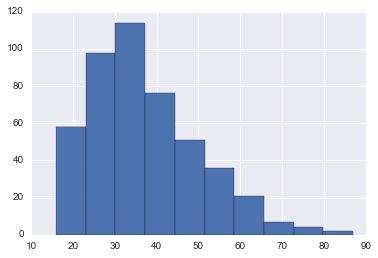

In [181]:
killings.age.hist()

In [ ]:
# 11. Show 6 histograms of ages by race

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fdc18d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112ede320>]], dtype=object)

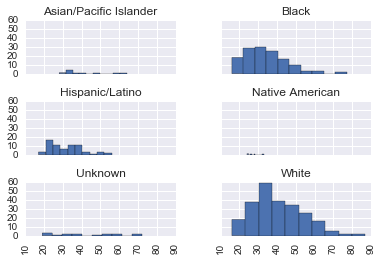

In [186]:
killings.age.hist(by=killings['race'], sharex=True, sharey=True)

In [ ]:
# 12. What is the average age of death by race?

In [193]:
killings.groupby('race').age.mean()

race
Asian/Pacific Islander    40.800000
Black                     34.044444
Hispanic/Latino           31.716418
Native American           27.750000
Unknown                   43.533333
White                     40.466102
Name: age, dtype: float64

In [ ]:
# 13. Show a bar chart with counts of deaths every month

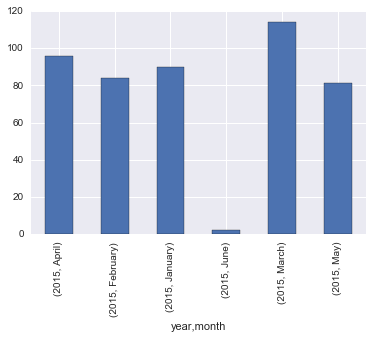

In [195]:
killings.groupby([killings.year, killings.month]).size().plot(kind='bar')

In [ ]:
###################
### Less Morbid ###
###################

In [196]:
majors = pd.read_csv('./data/college-majors.csv')
majors.head()

,Unnamed: 0,Major_code,Major,Major_category,Total,Employed,Employed_full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th
0,0,1100,GENERAL AGRICULTURE,Agriculture & Natural Resources,128148,90245,74078,2423,0.026147,50000,34000,80000.0
1,1,1101,AGRICULTURE PRODUCTION AND MANAGEMENT,Agriculture & Natural Resources,95326,76865,64240,2266,0.028636,54000,36000,80000.0
2,2,1102,AGRICULTURAL ECONOMICS,Agriculture & Natural Resources,33955,26321,22810,821,0.030248,63000,40000,98000.0
3,3,1103,ANIMAL SCIENCES,Agriculture & Natural Resources,103549,81177,64937,3619,0.042679,46000,30000,72000.0
4,4,1104,FOOD SCIENCE,Agriculture & Natural Resources,24280,17281,12722,894,0.049188,62000,38500,90000.0


In [ ]:
# 1. Delete the columns (employed_full_time_year_round, major_code)

In [201]:
del majors['Employed_full_time_year_round']
del majors['Major_code']

In [ ]:
# 2. Show the cout of missing values in each column

In [203]:
majors.isnull().sum()

Unnamed: 0           0
Major                0
Major_category       0
Total                0
Employed             0
Unemployed           0
Unemployment_rate    0
Median               0
P25th                0
P75th                0
dtype: int64

In [ ]:
# 3. What are the top 10 highest paying majors?
# Answer: Depends on the statistic you choose, ex: P75th or median. Both are shown below.

In [204]:
majors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 10 columns):
Unnamed: 0           173 non-null int64
Major                173 non-null object
Major_category       173 non-null object
Total                173 non-null int64
Employed             173 non-null int64
Unemployed           173 non-null int64
Unemployment_rate    173 non-null float64
Median               173 non-null int64
P25th                173 non-null int64
P75th                173 non-null float64
dtypes: float64(2), int64(6), object(2)
memory usage: 13.6+ KB


In [216]:
majors.sort_values(by='P75th', ascending=False).head(10)

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
59,59,PETROLEUM ENGINEERING,Engineering,19631,14002,617,0.042205,125000,75000,210000.0
97,97,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,7184,5874,150,0.024900,92000,53000,136000.0
58,58,NUCLEAR ENGINEERING,Engineering,9826,7320,527,0.067159,95000,65000,128000.0
154,154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,Health,180084,124058,4414,0.034358,106000,78000,125000.0
51,51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,Engineering,6264,4120,0,0.000000,85000,55000,125000.0
57,57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,16094,10690,449,0.040309,97000,60000,125000.0
56,56,MINING AND MINERAL ENGINEERING,Engineering,10746,7416,366,0.047032,92000,52000,124000.0
55,55,METALLURGICAL ENGINEERING,Engineering,12818,6939,326,0.044873,96000,65000,123000.0
45,45,CHEMICAL ENGINEERING,Engineering,188046,131697,6388,0.046261,86000,60000,120000.0
48,48,ELECTRICAL ENGINEERING,Engineering,671647,489965,26064,0.050509,88000,60000,116000.0


In [217]:
majors.sort_values(by='Median', ascending=False).head(10)

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
59,59,PETROLEUM ENGINEERING,Engineering,19631,14002,617,0.042205,125000,75000,210000.0
154,154,PHARMACY PHARMACEUTICAL SCIENCES AND ADMINISTR...,Health,180084,124058,4414,0.034358,106000,78000,125000.0
57,57,NAVAL ARCHITECTURE AND MARINE ENGINEERING,Engineering,16094,10690,449,0.040309,97000,60000,125000.0
55,55,METALLURGICAL ENGINEERING,Engineering,12818,6939,326,0.044873,96000,65000,123000.0
58,58,NUCLEAR ENGINEERING,Engineering,9826,7320,527,0.067159,95000,65000,128000.0
56,56,MINING AND MINERAL ENGINEERING,Engineering,10746,7416,366,0.047032,92000,52000,124000.0
97,97,MATHEMATICS AND COMPUTER SCIENCE,Computers & Mathematics,7184,5874,150,0.024900,92000,53000,136000.0
48,48,ELECTRICAL ENGINEERING,Engineering,671647,489965,26064,0.050509,88000,60000,116000.0
45,45,CHEMICAL ENGINEERING,Engineering,188046,131697,6388,0.046261,86000,60000,120000.0
51,51,GEOLOGICAL AND GEOPHYSICAL ENGINEERING,Engineering,6264,4120,0,0.000000,85000,55000,125000.0


In [ ]:
# 4. Plot the data from the last question in a bar chart, include proper title, and labels!

In [218]:
highest_paid = majors.sort_values(by='Median', ascending=False).head(10)

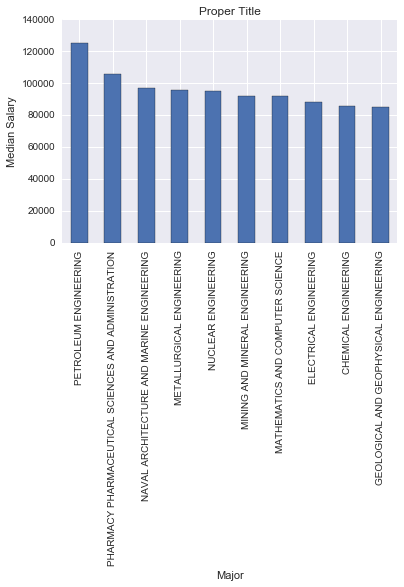

In [227]:
highest_paid.index = highest_paid.Major
highest_paid.Median.plot(kind='bar', title='Proper Title')
plt.ylabel('Median Salary')


In [ ]:
# 5. What is the average median salary for each major category?

In [231]:
majors.groupby('Major_category').Median.mean()

Major_category
Agriculture & Natural Resources        55000.000000
Arts                                   43525.000000
Biology & Life Science                 50821.428571
Business                               60615.384615
Communications & Journalism            49500.000000
Computers & Mathematics                66272.727273
Education                              43831.250000
Engineering                            77758.620690
Health                                 56458.333333
Humanities & Liberal Arts              46080.000000
Industrial Arts & Consumer Services    52642.857143
Interdisciplinary                      43000.000000
Law & Public Policy                    52800.000000
Physical Sciences                      62400.000000
Psychology & Social Work               44555.555556
Social Science                         53222.222222
Name: Median, dtype: float64

In [ ]:
# 6. Show only the top 5 paying major categories

In [233]:
majors.groupby('Major_category').Median.mean().sort_values(ascending=False).head(5)

Major_category
Engineering                77758.620690
Computers & Mathematics    66272.727273
Physical Sciences          62400.000000
Business                   60615.384615
Health                     56458.333333
Name: Median, dtype: float64

In [ ]:
# 7. Plot a histogram of the distribution of median salaries

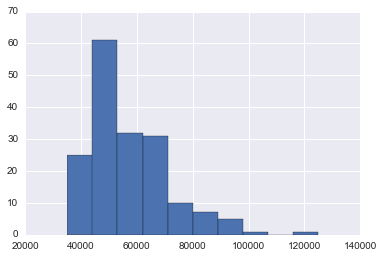

In [234]:
majors.Median.hist()

In [ ]:
# 8. Plot a histogram of the distribution of median salaries by major category
# Answer: Histograms by majors below, for each major. Is this what you meant?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12160b780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1221da8d0>]], dtype=object)

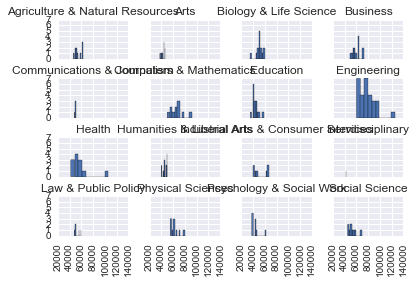

In [240]:
majors.Median.hist(by=majors['Major_category'], sharex=True, sharey=True)

In [ ]:
# 9. What are the top 10 most UNemployed majors?

In [245]:
majors.sort_values(by='Unemployed', ascending=False).head(10)

,Unnamed: 0,Major,Major_category,Total,Employed,Unemployed,Unemployment_rate,Median,P25th,P75th
161,161,BUSINESS MANAGEMENT AND ADMINISTRATION,Business,3123510,2354398,147261,0.058865,58000,39500,86000.0
158,158,GENERAL BUSINESS,Business,2148712,1580978,85626,0.051378,60000,40000,95000.0
114,114,PSYCHOLOGY,Psychology & Social Work,1484075,1055854,79066,0.069667,45000,31000,68000.0
159,159,ACCOUNTING,Business,1779219,1335825,75379,0.053415,65000,42500,100000.0
13,13,COMMUNICATIONS,Communications & Journalism,987676,790696,54390,0.064360,50000,35000,80000.0
73,73,ENGLISH LANGUAGE AND LITERATURE,Humanities & Liberal Arts,1098647,708882,52248,0.068645,50000,32900,75000.0
164,164,MARKETING AND MARKETING RESEARCH,Business,1114624,890125,51839,0.055033,56000,38500,90000.0
132,132,POLITICAL SCIENCE AND GOVERNMENT,Social Science,748956,541630,40376,0.069374,58000,38000,90000.0
25,25,GENERAL EDUCATION,Education,1438867,843693,38742,0.043904,43000,32000,59000.0
78,78,BIOLOGY,Biology & Life Science,839454,583079,36757,0.059301,51000,35000,80000.0


In [ ]:
# What are the unemployment rates?

In [249]:
majors.sort_values(by='Unemployed', ascending=False).head(10)[['Major', 'Unemployment_rate']]

,Major,Unemployment_rate
161,BUSINESS MANAGEMENT AND ADMINISTRATION,0.058865
158,GENERAL BUSINESS,0.051378
114,PSYCHOLOGY,0.069667
159,ACCOUNTING,0.053415
13,COMMUNICATIONS,0.064360
73,ENGLISH LANGUAGE AND LITERATURE,0.068645
164,MARKETING AND MARKETING RESEARCH,0.055033
132,POLITICAL SCIENCE AND GOVERNMENT,0.069374
25,GENERAL EDUCATION,0.043904
78,BIOLOGY,0.059301


In [ ]:
# 10. What are the top 10 most UNemployed majors CATEGORIES? Use the mean for each category
# What are the unemployment rates?

In [250]:
majors.groupby('Major_category').Unemployed.mean().sort_values(ascending=False).head(10)

Major_category
Business                       33415.153846
Communications & Journalism    25299.750000
Social Science                 14683.333333
Arts                           13015.625000
Humanities & Liberal Arts      11942.400000
Psychology & Social Work       11578.444444
Law & Public Policy             8609.800000
Education                       7833.500000
Computers & Mathematics         7270.363636
Health                          6251.083333
Name: Unemployed, dtype: float64

In [ ]:
# 11. the total and employed column refer to the people that were surveyed.
# Create a new column showing the emlpoyment rate of the people surveyed for each major
# call it "sample_employment_rate"
# Example the first row has total: 128148 and employed: 90245. it's 
# sample_employment_rate should be 90245.0 / 128148.0 = .7042

In [251]:
majors['sample_employment_rate'] = majors.Employed / majors.Total

In [252]:
majors.sample_employment_rate

0      0.704225
1      0.806338
2      0.775173
3      0.783948
4      0.711738
5      0.793902
6      0.747950
7      0.747690
8      0.825608
9      0.694458
10     0.792626
11     0.735582
12     0.730654
13     0.800562
14     0.752057
15     0.807119
16     0.789133
17     0.798330
18     0.859982
19     0.778661
20     0.837966
21     0.853326
22     0.822265
23     0.851268
24     0.788848
25     0.586359
26     0.771117
27     0.622705
28     0.566387
29     0.686010
         ...   
143    0.806326
144    0.674669
145    0.725842
146    0.755610
147    0.748192
148    0.658775
149    0.786656
150    0.797298
151    0.736281
152    0.584640
153    0.749035
154    0.688890
155    0.789940
156    0.749775
157    0.677554
158    0.735779
159    0.750793
160    0.803646
161    0.753767
162    0.827640
163    0.767509
164    0.798588
165    0.821361
166    0.762941
167    0.772135
168    0.813491
169    0.858336
170    0.753954
171    0.671453
172    0.669841
Name: sample_employment_

In [ ]:
# 12. Create a "sample_unemployment_rate" column
# this column should be 1 - "sample_employment_rate"

In [253]:
majors['sample_unemployment_rate'] = 1 - majors.sample_employment_rate

In [255]:
majors.sample_unemployment_rate

0      0.295775
1      0.193662
2      0.224827
3      0.216052
4      0.288262
5      0.206098
6      0.252050
7      0.252310
8      0.174392
9      0.305542
10     0.207374
11     0.264418
12     0.269346
13     0.199438
14     0.247943
15     0.192881
16     0.210867
17     0.201670
18     0.140018
19     0.221339
20     0.162034
21     0.146674
22     0.177735
23     0.148732
24     0.211152
25     0.413641
26     0.228883
27     0.377295
28     0.433613
29     0.313990
         ...   
143    0.193674
144    0.325331
145    0.274158
146    0.244390
147    0.251808
148    0.341225
149    0.213344
150    0.202702
151    0.263719
152    0.415360
153    0.250965
154    0.311110
155    0.210060
156    0.250225
157    0.322446
158    0.264221
159    0.249207
160    0.196354
161    0.246233
162    0.172360
163    0.232491
164    0.201412
165    0.178639
166    0.237059
167    0.227865
168    0.186509
169    0.141664
170    0.246046
171    0.328547
172    0.330159
Name: sample_unemploymen